
 Multivariate Functional Principal Components Analysis

This notebook shows how to perform an multivariate functional principal
components analysis on an example dataset.


## Loading Libraries

In [24]:

import matplotlib.pyplot as plt
import pandas as pd

from FDApy.representation.functional_data import MultivariateFunctionalData
from FDApy.preprocessing.dim_reduction.fpca import MFPCA
from FDApy.visualization.plot import plot
from FDApy.misc.loader import read_csv

In [9]:
def wf(x):
    return '/Users/pruthvibharadwaj/Desktop/Spring 22/MA679 - ML/Project/Data/' + x

## Load the data as DenseFunctionalData.


In [47]:
V_GRF_stance_N = read_csv(wf('V_GRF_stance_N.csv'))
ML_GRF_stance_N = read_csv(wf('ML_GRF_stance_N.csv'))
AP_GRF_stance_N = read_csv(wf('AP_GRF_stance_N.csv'))

In [48]:
COPx_stance = read_csv(wf('COPx_stance.csv'))
COPy_stance = read_csv(wf('COPy_stance.csv'))

In [49]:
# Create multivariate functional data

GRF = MultivariateFunctionalData([V_GRF_stance_N,ML_GRF_stance_N, AP_GRF_stance_N])
COP = MultivariateFunctionalData([COPx_stance,COPy_stance])

# Multivariate functional PCA

## GRF

In [78]:
# Perform multivariate FPCA
grf_mfpca = MFPCA(n_components=[0.95,0.95,0.95])
grf_mfpca.fit(GRF, method='NumInt')

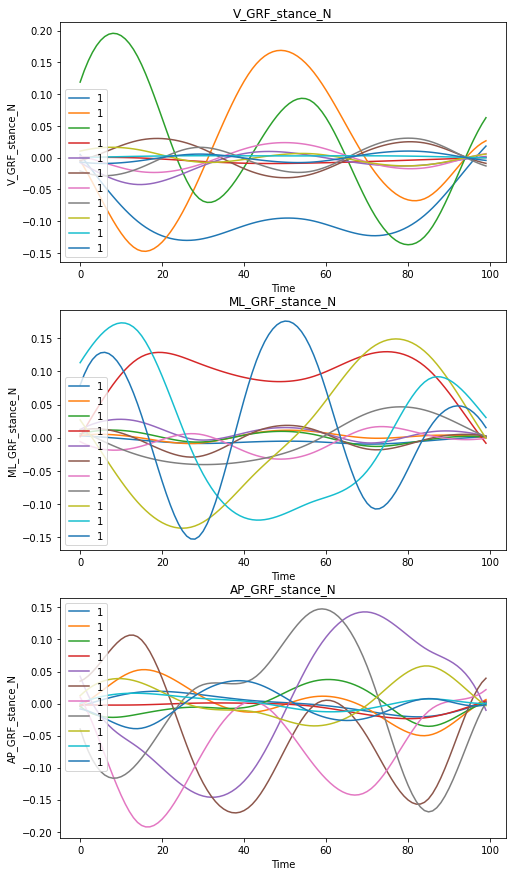

In [83]:
# Plot the results of the FPCA (eigenfunctions)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1 , figsize=(8, 15))
_ = plot(grf_mfpca.basis[0], ax=ax1, label = 1)
_ = plot(grf_mfpca.basis[1], ax=ax2, label = 1)
_ = plot(grf_mfpca.basis[2], ax=ax3, label = 1)

ax1.title.set_text('V_GRF_stance_N')
ax2.title.set_text('ML_GRF_stance_N')
ax3.title.set_text('AP_GRF_stance_N')

ax1.set_xlabel('Time')
ax2.set_xlabel('Time')
ax3.set_xlabel('Time')

ax1.set_ylabel('V_GRF_stance_N')
ax2.set_ylabel('ML_GRF_stance_N')
ax3.set_ylabel('AP_GRF_stance_N')

ax1.legend()
ax2.legend()
ax3.legend()

plt.savefig("/Users/pruthvibharadwaj/Desktop/Spring 22/MA679 - ML/Project/GRF_MFPCA.png")

In [80]:
grf_mfpca.covariance

array([[ 1.92481740e+06,  2.15712248e+04, -1.62920166e+04,
        -1.18096480e+05, -4.91772454e+03, -9.40211230e+03,
         2.35227501e+04,  2.32604927e+05, -2.88198615e+04,
         2.97801099e+01, -6.97800570e+03],
       [ 2.15712248e+04,  3.68952933e+05, -1.41579939e+04,
         2.05836898e+03,  9.98627514e+03,  1.13807196e+04,
         1.42481938e+04,  9.96693054e+04,  3.61373427e+04,
         1.95311287e+04, -2.71093406e+03],
       [-1.62920166e+04, -1.41579939e+04,  1.18657256e+05,
         2.38178453e+03,  2.63237258e+03, -4.17857395e+03,
        -8.10126078e+03, -8.05357294e+03, -2.74659438e+03,
        -2.04267151e+04,  1.43634435e+04],
       [-1.18096480e+05,  2.05836898e+03,  2.38178453e+03,
         2.04928079e+04, -4.75795287e+01, -2.37253718e+02,
        -1.73373093e+02, -1.30835369e+04,  1.99648222e+03,
        -1.86123033e+02, -1.00859368e+02],
       [-4.91772454e+03,  9.98627514e+03,  2.63237258e+03,
        -4.75795287e+01,  2.20888501e+03,  5.98688347e+01,
  

In [57]:
grf_mfpca.eigenvectors

array([[-9.90093112e-01,  5.01056647e-02,  9.41856500e-03,
        -5.06834562e-02, -1.03916779e-01,  4.25682689e-02,
        -2.88848156e-02,  1.85581176e-02, -1.13113830e-02,
         2.39349946e-02,  7.56358767e-03],
       [-2.08516961e-02, -9.56721260e-01,  7.34720344e-02,
         2.58411384e-02, -1.45316246e-01,  1.86423882e-01,
        -1.42212896e-01,  4.22288229e-02,  7.80186185e-03,
        -1.97678879e-03,  1.55080497e-02],
       [ 9.58708320e-03,  5.88333172e-02,  9.73634414e-01,
         2.42700134e-03, -5.27018552e-02, -5.53718029e-02,
         3.33917427e-02, -1.76447105e-01,  8.37716524e-02,
         1.23989252e-04, -5.80262808e-02],
       [ 6.10457529e-02, -1.21644045e-02,  1.29910500e-02,
        -9.84486423e-01, -5.38121654e-02,  5.87384938e-02,
         4.35486549e-02,  3.28622266e-02, -3.46247065e-02,
         1.19965973e-01,  4.27794602e-02],
       [ 2.25033942e-03, -2.59041950e-02,  2.68067947e-02,
         3.83359860e-02,  3.68917642e-02, -3.75028198e-02,
  

Compute the scores of the dailyTemp data into the eigenfunctions basis using
numerical integration.



In [89]:
# Compute the scores
GRF_proj = grf_mfpca.transform(GRF)

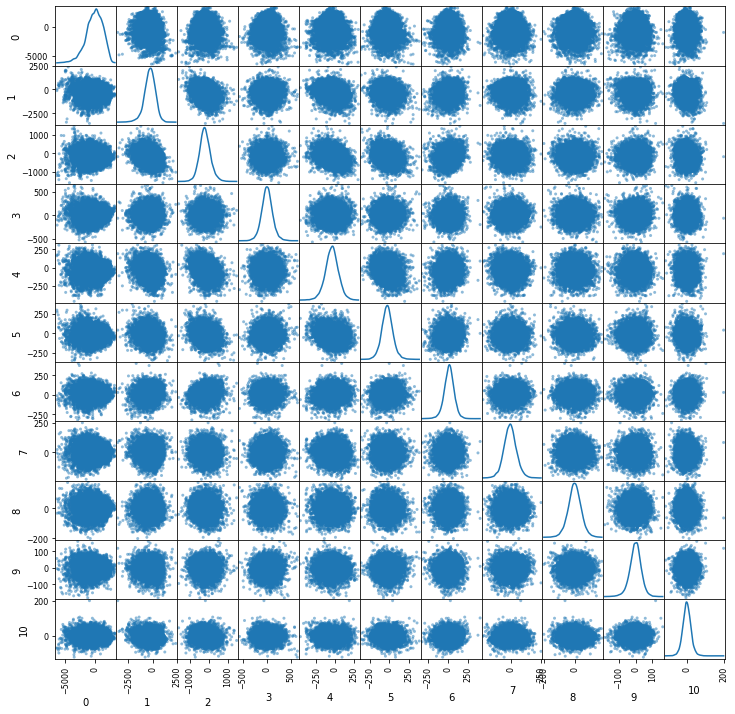

In [90]:
# Plot the projection of the data onto the eigenfunctions
_ = pd.plotting.scatter_matrix(pd.DataFrame(GRF_proj), diagonal='kde', figsize=(12, 12))
plt.savefig("/Users/pruthvibharadwaj/Desktop/Spring 22/MA679 - ML/Project/GRF_proj_scatter.png")

Then, we can test if the reconstruction of the data is good.



In [92]:
# Test if the reconstruction is good.
GRF_reconst = grf_mfpca.inverse_transform(GRF_proj)

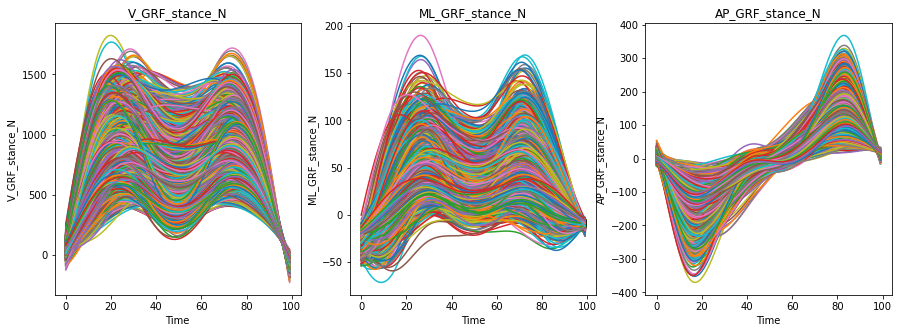

In [93]:
# Plot the reconstructed curves
fig, (ax1, ax2, ax3 ) = plt.subplots(1, 3,  figsize=(15, 5))
_ = plot(GRF_reconst[0], ax=ax1)
_ = plot(GRF_reconst[1], ax=ax2)
_ = plot(GRF_reconst[2], ax=ax3)

ax1.title.set_text('V_GRF_stance_N')
ax2.title.set_text('ML_GRF_stance_N')
ax3.title.set_text('AP_GRF_stance_N')

ax1.set_xlabel('Time')
ax2.set_xlabel('Time')
ax3.set_xlabel('Time')

ax1.set_ylabel('V_GRF_stance_N')
ax2.set_ylabel('ML_GRF_stance_N')
ax3.set_ylabel('AP_GRF_stance_N')


plt.savefig("/Users/pruthvibharadwaj/Desktop/Spring 22/MA679 - ML/Project/GRF_reconst.png")

## COP

In [94]:
# Perform multivariate FPCA
cop_mfpca = MFPCA(n_components=[0.95,0.95])
cop_mfpca.fit(COP, method='NumInt')

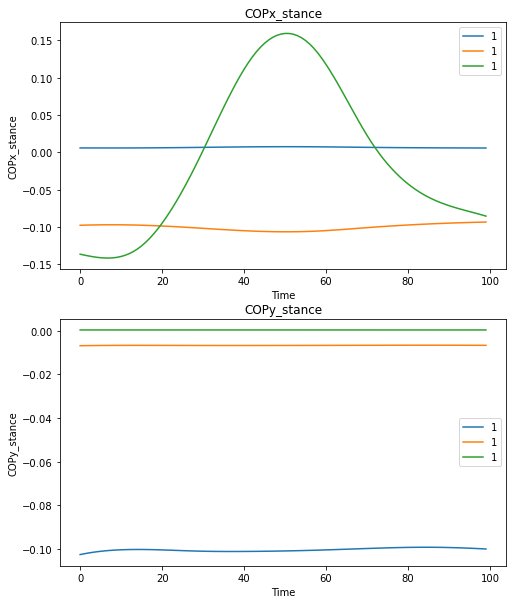

In [95]:
# Plot the results of the FPCA (eigenfunctions)
fig, (ax1, ax2) = plt.subplots(2, 1 , figsize=(8, 10))
_ = plot(cop_mfpca.basis[0], ax=ax1, label = 1)
_ = plot(cop_mfpca.basis[1], ax=ax2, label = 1)


ax1.title.set_text('COPx_stance')
ax2.title.set_text('COPy_stance')


ax1.set_xlabel('Time')
ax2.set_xlabel('Time')


ax1.set_ylabel('COPx_stance')
ax2.set_ylabel('COPy_stance')


ax1.legend()
ax2.legend()

plt.savefig("/Users/pruthvibharadwaj/Desktop/Spring 22/MA679 - ML/Project/COP_MFPCA.png")

In [96]:
# Compute the scores
COP_proj = cop_mfpca.transform(COP)

In [ ]:
cop_mfpca.covariance

In [ ]:
grf_mfpca.eigenvectors

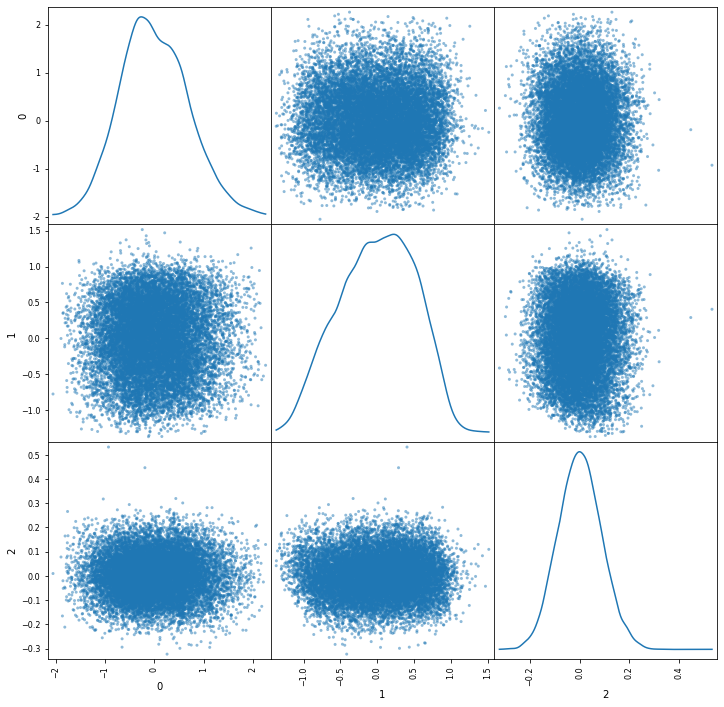

In [97]:
# Plot the projection of the data onto the eigenfunctions
_ = pd.plotting.scatter_matrix(pd.DataFrame(COP_proj), diagonal='kde', figsize=(12, 12))
plt.savefig("/Users/pruthvibharadwaj/Desktop/Spring 22/MA679 - ML/Project/COP_proj_scatter.png")

In [99]:
# Test if the reconstruction is good.
COP_reconst = cop_mfpca.inverse_transform(COP_proj)

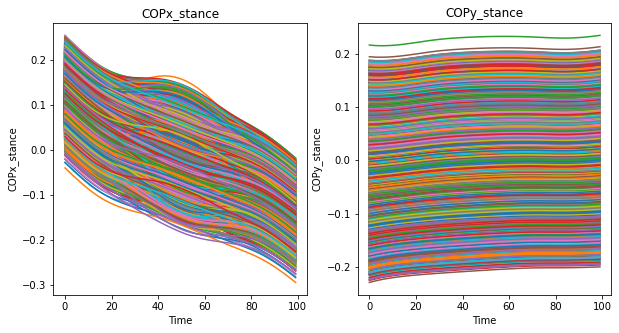

In [100]:
# Plot the reconstructed curves
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(10, 5))
_ = plot(COP_reconst[0], ax=ax1)
_ = plot(COP_reconst[1], ax=ax2)


ax1.title.set_text('COPx_stance')
ax2.title.set_text('COPy_stance')


ax1.set_xlabel('Time')
ax2.set_xlabel('Time')


ax1.set_ylabel('COPx_stance')
ax2.set_ylabel('COPy_stance')

plt.savefig("/Users/pruthvibharadwaj/Desktop/Spring 22/MA679 - ML/Project/COP_reconst.png")